referencia: http://brandonrose.org/clustering
_id: 5dbc3d2cfcaa0c48eadcac4a

### acessando dados

In [1]:
from pymongo import MongoClient

client = MongoClient()  
db = client['webscraping'] # access db
collection = db['documents'] # access collection

In [2]:
documents = list(collection.find())
print(len(documents))

56


In [3]:
# from bson.objectid import ObjectId

# document = collection.find_one({'_id': ObjectId("5dc04ca6a3689e055a7dbc44")})
# assuntos = [pauta.get('assunto') for pauta in document.get('pautas')]
# assuntos

In [80]:
# from random import choice

# id_document = choice(range(0, len(documents)))
# document = documents[id_document]

# assuntos = [pauta.get('assunto') for pauta in document.get('pautas')]
# assuntos

["Altera dispositivos da Lei n° 4.100 , de 19 de junho de 1992 , que `` Dispõe sobre o Código do Meio Ambiente do Município de Natal , e dá outras providências ''",
 'Estabelece o Sistema Municipal de Segurança para usuários e profissionais autônomos de veículos de transportes de passageiros por aluguel a taxímetro da Cidade do Natal , através da implantação em toda frota de taxis de GPS integrado a uma central pública de monitoramento , rastreamento e conexão de dado móvel via satélite , e dá outras providências',
 'Lei Pontes para a Vida Recomenda a instalação de equipamentos de proteção nas pontes , viadutos e passarelas situadas na Cidade do Natal',
 "Dispõe sobre incineradores de lixo , limpeza das caixas D'água nos hospitais e entidades especificadas , e dá outras providências",
 'Reserva aos idosos o percentual de 5 % das vagas de estágio nos órgãos da Administração Pública Municipal , e dá outras providências',
 'Concede o título de cidadão Natalense ao senhor Richard Ribeiro P

In [4]:
assuntos = []
for document in documents:
    if not document.get('pautas'):
        continue
    for pauta in document.get('pautas'):
        assuntos.append(pauta.get('assunto'))
assuntos

['Autoriza a compensação de dívidas de qualquer natureza perante o município de Natal com créditos líquidos certos , vencidos ou vincendos , ainda de que natureza tributária , de titularidade de servidores públicos municipais e dá outras providências ',
 'Dispõe sobre a obrigatoriedade de notificar aos órgãos de proteção da criança e do adolescente os casos de uso de álcool e outras drogas',
 'Dispõe sobre a Política Municipal de incentivo e fomento às feiras de alimentos orgânicos no âmbito do Município de Natal , e dá outras providências',
 "Reconhece como Utilidade Pública Municipal a `` Associação Cultural Padre Piná ACPP '' , e dá outras providências",
 'Dispõe sobre a reversão ao patrimônio público do Município de Natal de área 10.145.00 m² , a qual foi doada para fins de edificação , respectivamente , da sede do Egrégio Tribunal de Justiça do Estado do Rio Grande do Norte , e dá outras providências',
 "Altera a Lei nº 6.709/2017 , que `` Institui o Setembro Verde '' , e dá outra

In [30]:
import pandas as pd


assuntos = []
tipos_de_pauta = []
for document in documents:
    if not document.get('pautas'):
        continue
    for pauta in document.get('pautas'):
        assuntos.append(pauta.get('assunto').lower())
        tipos_de_pauta.append(pauta.get('tipo'))

df_assuntos = pd.DataFrame({'assuntos': assuntos, 'tipos': tipos_de_pauta})
df_assuntos.to_csv('assuntos.csv', index=False, sep=';')
df_assuntos.head(10)

,assuntos,tipos
0,autoriza a compensação de dívidas de qualquer ...,PROJETO DE LEI
1,dispõe sobre a obrigatoriedade de notificar ao...,EMENDA ENCARTADA PROJETO DE LEI
2,dispõe sobre a política municipal de incentivo...,PROJETO DE LEI
3,reconhece como utilidade pública municipal a `...,PROJETO DE LEI
4,dispõe sobre a reversão ao patrimônio público ...,PROJETO DE LEI
5,"altera a lei nº 6.709/2017 , que `` institui o...",PROJETO DE LEI
6,ficam os veículos de transporte turístico auto...,PROJETO DE LEI
7,destina 5 % cinco por cento das vagas de concu...,PROJETO DE LEI
8,"determina a sustação da portaria nº100/2015 , ...",PROJETO DE DECRETO LEGISLATIVO
9,"requer que seja enviado oficio a urbana , soli...",REQUERIMENTO


In [44]:
searchfor = ['natalense', 'natalence']
cidadao = len(df_assuntos[df_assuntos.assuntos.str.contains('|'.join(searchfor))])
#cidadao = len(df_assuntos[df_assuntos['assuntos'].str.contains("natalense")])
#cidadao += len(df_assuntos[df_assuntos['assuntos'].str.contains("natalence")])

print("total %s" % cidadao)
print('%0.2f' % ((cidadao*100)/len(df_assuntos)))

total 21
1.18


In [45]:
print("REQUERIMENTO %s" %  len(df_assuntos[df_assuntos.tipos == "requerimento"]))

semov = len(df_assuntos[df_assuntos['assuntos'].str.contains("semov")])
semob = len(df_assuntos[df_assuntos['assuntos'].str.contains("semob")])
semopi = len(df_assuntos[df_assuntos['assuntos'].str.contains("semopi")])
semurb = len(df_assuntos[df_assuntos['assuntos'].str.contains("semurb")])
urbana = len(df_assuntos[df_assuntos['assuntos'].str.contains("urbana")])
semsur = len(df_assuntos[df_assuntos['assuntos'].str.contains("semsur")])
sttu = len(df_assuntos[df_assuntos['assuntos'].str.contains("sttu")]) 
caern = len(df_assuntos[df_assuntos['assuntos'].str.contains("caern")])  
dnit = len(df_assuntos[df_assuntos['assuntos'].str.contains("dnit")])  


# SEL Secretaria Municipal de Esporte e Lazer
# SEMTAS Secretaria Municipal de Trabalho e Assistência Social

print("SEMOV %s" % semov) # Secretaria Municipal de Obras e Viação
print("SEMOB %s" % semob) # Secretaria Municipal de Mobilidade Urbana
print("SEMOPI %s" % semopi) # Secretaria Municipal de Obras Públicas e Infraestrutura
print("SEMURB %s" % semurb) # Secretaria Municipal de Meio Ambiente e Urbanismo 
print("URBANA %s" % urbana) # Companhia de Serviços Urbanos de Natal
print("SEMSUR %s" % semsur) # Secretaria Municipal de Serviços Urbanos
print("STTU %s" % sttu) # 
print("CAERN %s" % caern) # 
print("DNIT %s" % dnit) # Departamento Nacional de Infraestrutura de Transportes
print("TOTAL SECRETARIAS: %s" % (semov + semob + semopi + semurb + urbana + semsur + sttu + caern + dnit))

print()
print("TOTAL PAUTAS: %s" % len(df_assuntos))

print('requerimentos %0.2f' % ((len(df_assuntos[df_assuntos.tipos == "REQUERIMENTO"])*100)/len(df_assuntos)))

print('secretarias %0.2f' % (((semov + semob + semopi + semurb + urbana + semsur + sttu + caern + dnit)*100)/len(df_assuntos)))

REQUERIMENTO 0
SEMOV 518
SEMOB 0
SEMOPI 2
SEMURB 17
URBANA 179
SEMSUR 367
STTU 119
CAERN 15
DNIT 3
TOTAL SECRETARIAS: 1220

TOTAL PAUTAS: 1773
requerimentos 83.98
secretarias 68.81


In [8]:
texto = assuntos[7]
texto

'Destina 5 % cinco por cento das vagas de concursos públicos do Município de Natal para os desempregados , e dá outras providências'

### Stopwords, stemming, and tokenizing

Stopwords são palavras tidas como "irrelevantes". E para nossa análise, elas serão removidas, e só palavras-chaves (que tenham um sentido importante pra compreensão da frase) serão mantidas.

In [6]:
import nltk


stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

SnowballStemmer é parte da biblioteca do nltk, e serve para pegar somente a raiz da palavra.

In [9]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("portuguese")

print(texto.split()[0])
print(stemmer.stem(texto.split()[0]))

Destina
destin


Para nosso análise será importante trabalhar com **tokens**. A ideia é que, removendo as stopwords, ficamos somente com as palavras releventes, e transformaremos cada uma em **token**.

In [10]:
tokens = [word for word in nltk.word_tokenize(texto)]
tokens

['Destina',
 '5',
 '%',
 'cinco',
 'por',
 'cento',
 'das',
 'vagas',
 'de',
 'concursos',
 'públicos',
 'do',
 'Município',
 'de',
 'Natal',
 'para',
 'os',
 'desempregados',
 ',',
 'e',
 'dá',
 'outras',
 'providências']

In [11]:
import re 

filtered_tokens = []
# filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
for token in tokens:
    if re.search('[a-zA-Z]', token):
        filtered_tokens.append(token)
stems = [stemmer.stem(t) for t in filtered_tokens]
stems

['destin',
 'cinc',
 'por',
 'cent',
 'das',
 'vag',
 'de',
 'concurs',
 'públic',
 'do',
 'municípi',
 'de',
 'natal',
 'par',
 'os',
 'desempreg',
 'e',
 'dá',
 'outr',
 'provident']

In [12]:
tokens = [word.lower() for sent in nltk.sent_tokenize(texto) for word in nltk.word_tokenize(sent)]
filtered_tokens = []

for token in tokens:
    if re.search('[a-zA-Z]', token):
        filtered_tokens.append(token)
filtered_tokens

['destina',
 'cinco',
 'por',
 'cento',
 'das',
 'vagas',
 'de',
 'concursos',
 'públicos',
 'do',
 'município',
 'de',
 'natal',
 'para',
 'os',
 'desempregados',
 'e',
 'dá',
 'outras',
 'providências']

In [13]:
import spacy
nlp = spacy.load('pt_core_news_sm')
remove_tags = ["VERB", "ADP", "DET", "CCONJ"]


def to_remove(word):
    sentence = "ela " + word.lower()
    token = nlp(sentence)
    if token[1].pos_ in remove_tags:
        return True
    return False

# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

Com as funções para *tokenize* e *stem*, vamos criar um DataFrame com a raiz das palavras como index, e as palavras token como valores das colunas. Dessa forma temos uma maneira eficiente de olhar o stem e o token completo.

**note**: podemos ter o mesmo token associado a mais de uma palavra.

In [14]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for assunto in assuntos:
    allwords_stemmed = tokenize_and_stem(assunto) #for each item in 'assuntos', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(assunto)
    totalvocab_tokenized.extend(allwords_tokenized)

In [15]:
import pandas as pd

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 48916 items in vocab_frame


In [16]:
vocab_frame.head()

,words
autoriz,autoriza
a,a
compens,compensação
de,de
dív,dívidas


### Tf-idf e document similarity

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

sw = stopwords.words('portuguese')
sw.append('enviado')
sw.append('requer')
#sw.append('ofício')
#sw.append('natal/rn')
sw.append('solicitando')
sw.append('nº')
#sw.append('rua')
#sw.append('bairro')


# define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                   min_df=0.2, stop_words=set(sw), 
                                   analyzer='word',
                                   use_idf=True, 
                                   tokenizer=tokenize_only, 
                                   ngram_range=(1, 3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(assuntos) #fit the vectorizer to assuntos

print(tfidf_matrix.shape)

CPU times: user 781 ms, sys: 10.7 ms, total: 792 ms
Wall time: 797 ms
(1773, 7)


In [18]:
terms = tfidf_vectorizer.get_feature_names()
terms

['bairro', 'natal', 'ofício', 'ofício semov', 'rua', 'semov', 'semsur']

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
dist

array([[0., 1., 0., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [0., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

### K-means clustering

In [20]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters, n_init=20, max_iter=100)
#km = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
#    n_clusters=num_clusters, n_init=1, n_jobs=1, precompute_distances='auto',
#    random_state=None, tol=0.0001, verbose=0)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 941 ms, sys: 5.51 ms, total: 946 ms
Wall time: 955 ms


In [24]:
#!wget https://github.com/brandomr/document_cluster/raw/master/doc_cluster.pkl
#!wget https://github.com/brandomr/document_cluster/raw/master/doc_cluster.pkl_01.npy
#!wget https://github.com/brandomr/document_cluster/raw/master/doc_cluster.pkl_02.npy

In [25]:
# from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

# joblib.dump(km,  'model/doc_cluster_assuntos.pkl')
# km = joblib.load('model/doc_cluster_assuntos.pkl')
clusters = km.labels_.tolist()

In [21]:
docs = { 'assunto': assuntos, 'cluster': clusters }

frame = pd.DataFrame(docs, index = [clusters] , columns = ['assunto', 'cluster'])

In [22]:
frame['cluster'].value_counts() #number of assuntos per cluster (clusters from 0 to 4)

1    502
4    375
0    351
2    300
3    245
Name: cluster, dtype: int64

In [28]:
#grouped = frame['...'].groupby(frame['cluster']) #groupby cluster for aggregation purposes

#grouped.mean()  

In [23]:
from __future__ import print_function

#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

print(order_centroids)

[[6 2 0 4 1 5 3]
 [5 3 4 2 0 1 6]
 [1 2 4 0 5 6 3]
 [4 6 5 3 2 1 0]
 [2 0 4 1 5 6 3]]


In [24]:
for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    print()
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print([terms[ind].split(' ')])

Cluster 0 words:
[['semsur']]
[['ofício']]
[['bairro']]
[['rua']]
[['natal']]
[['semov']]
Cluster 1 words:
[['semov']]
[['ofício', 'semov']]
[['rua']]
[['ofício']]
[['bairro']]
[['natal']]
Cluster 2 words:
[['natal']]
[['ofício']]
[['rua']]
[['bairro']]
[['semov']]
[['semsur']]
Cluster 3 words:
[['rua']]
[['semsur']]
[['semov']]
[['ofício', 'semov']]
[['ofício']]
[['natal']]
Cluster 4 words:
[['ofício']]
[['bairro']]
[['rua']]
[['natal']]
[['semov']]
[['semsur']]


In [31]:
#vocab_frame.loc['solicit']

In [25]:
print("Top terms per cluster:")
print()

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :3]: #replace 6 with n words per cluster
        vocab = tokenize_and_stem(terms[ind])
        print(' %s' % vocab_frame.loc[vocab].values.tolist()[0][0], end=',')
        #.encode('utf-8', 'ignore')
    print() #add whitespace
    print() #add whitespace
    
    # print("Cluster %d assunto:" % i, end='')
    #for assunto in frame.loc[i]['assunto'].values.tolist():
    #    print(' %s,' % assunto, end='')
    #print() #add whitespace
    #print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: semsur, ofício, bairro,

Cluster 1 words: semov, ofício, rua,

Cluster 2 words: natal, ofício, rua,

Cluster 3 words: rua, semsur, semov,

Cluster 4 words: ofício, bairro, rua,





In [33]:
#print(frame[['assunto']].loc[frame['cluster'] == 2].to_html(index=False))

### Multidimensional scaling

similar a PCA, estudar isso melhor!

a ideia é converter a dist matrix em um 2-dimensional array

In [26]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [27]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: '00', 
                 1: '01', 
                 2: '02', 
                 3: '03', 
                 4: '04'}

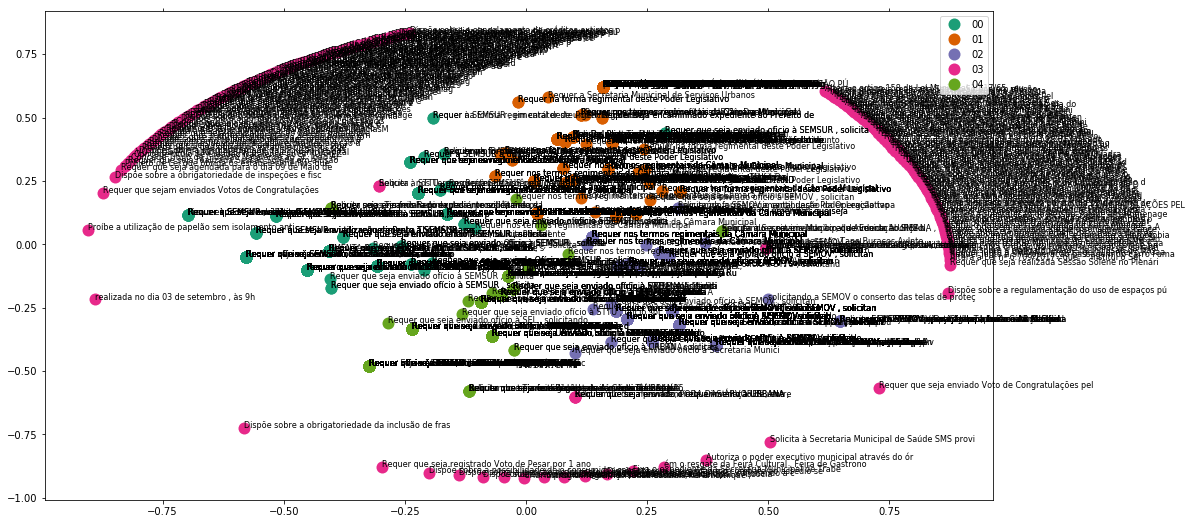

In [36]:
# %matplotlib inline
 
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=assuntos)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['title'][:50], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

In [37]:
plt.close()

In [38]:
#!pip install mpld3

In [28]:
import mpld3

class TopToolbar(mpld3.plugins.PluginBase):
    """Plugin for moving toolbar to top of figure"""

    JAVASCRIPT = """
    mpld3.register_plugin("toptoolbar", TopToolbar);
    TopToolbar.prototype = Object.create(mpld3.Plugin.prototype);
    TopToolbar.prototype.constructor = TopToolbar;
    function TopToolbar(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    TopToolbar.prototype.draw = function(){
      // the toolbar svg doesn't exist
      // yet, so first draw it
      this.fig.toolbar.draw();

      // then change the y position to be
      // at the top of the figure
      this.fig.toolbar.toolbar.attr("x", 150);
      this.fig.toolbar.toolbar.attr("y", 400);

      // then remove the draw function,
      // so that it is not called again
      this.fig.toolbar.draw = function() {}
    }
    """
    def __init__(self):
        self.dict_ = {"type": "toptoolbar"}

In [29]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=assuntos)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -80px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

### Hierarchical document clustering


from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(20, 15)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=assuntos);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [41]:
plt.close()

### Latent Dirichlet Allocation

In [42]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens])

In [43]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) # use NLTK's part of speech tagger
    print(tagged)
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [44]:
#!pip install gensim

In [45]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in assuntos]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in sw] for text in tokenized_text]

CPU times: user 525 ms, sys: 2.76 ms, total: 527 ms
Wall time: 529 ms
CPU times: user 1.4 s, sys: 6.02 ms, total: 1.4 s
Wall time: 1.41 s
CPU times: user 63.2 ms, sys: 550 µs, total: 63.8 ms
Wall time: 63.9 ms


In [46]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [47]:
%time lda = models.LdaModel(corpus, num_topics=5, id2word=dictionary, update_every=5, chunksize=10000, passes=100)

CPU times: user 1min 50s, sys: 1.65 s, total: 1min 52s
Wall time: 1min 53s


In [48]:
topics = lda.print_topics(5, num_words=20)
topics

[(0,
  '0.065*"burac" + 0.065*"oper" + 0.059*"tap" + 0.028*"sobr" + 0.027*"dá" + 0.027*"outr" + 0.027*"provident" + 0.016*"par" + 0.008*"inform" + 0.008*"junt" + 0.007*"públic" + 0.006*"incent" + 0.006*"lateral" + 0.006*"inclusã" + 0.006*"servic" + 0.006*"cont" + 0.006*"águ" + 0.005*"empres" + 0.005*"obrigatoriedad" + 0.005*"especif"'),
 (1,
  '0.085*"sej" + 0.075*"envi" + 0.073*"solicit" + 0.065*"ofíci" + 0.039*"term" + 0.038*"regiment" + 0.021*"situ" + 0.017*"zon" + 0.017*"frent" + 0.016*"par" + 0.014*"instal" + 0.013*"nort" + 0.013*"servic" + 0.013*"post" + 0.012*"implant" + 0.011*"localiz" + 0.009*"titul" + 0.008*"faix" + 0.008*"pedestr" + 0.007*"cas"'),
 (2,
  '0.140*"sej" + 0.129*"solicit" + 0.124*"envi" + 0.122*"ofíci" + 0.053*"bairr" + 0.033*"localiz" + 0.020*"limpez" + 0.012*"servic" + 0.012*"paviment" + 0.011*"asfált" + 0.011*"árvor" + 0.011*"realiz" + 0.010*"pod" + 0.009*"frent" + 0.008*"manutençã" + 0.008*"lâmp" + 0.008*"post" + 0.007*"capin" + 0.007*"feit" + 0.007*"capeame

In [49]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
topics_matrix

[(0,
  [('burac', 0.06518914),
   ('oper', 0.06468105),
   ('tap', 0.058579247),
   ('sobr', 0.028185276),
   ('dá', 0.027337562),
   ('outr', 0.027269343),
   ('provident', 0.026912598),
   ('par', 0.015954461),
   ('inform', 0.008401829),
   ('junt', 0.0077284435),
   ('públic', 0.007174075),
   ('incent', 0.0062109563),
   ('lateral', 0.006198616),
   ('inclusã', 0.0061977366),
   ('servic', 0.0060280086),
   ('cont', 0.0056932294),
   ('águ', 0.005692354),
   ('empres', 0.00529887),
   ('obrigatoriedad', 0.004837291),
   ('especif', 0.0046811565)]),
 (1,
  [('sej', 0.085129075),
   ('envi', 0.074928),
   ('solicit', 0.07261013),
   ('ofíci', 0.06473802),
   ('term', 0.038645532),
   ('regiment', 0.037918277),
   ('situ', 0.020573212),
   ('zon', 0.017052714),
   ('frent', 0.016934725),
   ('par', 0.01593441),
   ('instal', 0.014442828),
   ('nort', 0.013188523),
   ('servic', 0.012887655),
   ('post', 0.012541367),
   ('implant', 0.011695886),
   ('localiz', 0.011289052),
   ('titu

In [50]:
import numpy as np 

topics_matrix = np.array(topics_matrix)

In [51]:
topic_words = topics_matrix[:,1]
topic_words

array([list([('burac', 0.06518914), ('oper', 0.06468105), ('tap', 0.058579247), ('sobr', 0.028185276), ('dá', 0.027337562), ('outr', 0.027269343), ('provident', 0.026912598), ('par', 0.015954461), ('inform', 0.008401829), ('junt', 0.0077284435), ('públic', 0.007174075), ('incent', 0.0062109563), ('lateral', 0.006198616), ('inclusã', 0.0061977366), ('servic', 0.0060280086), ('cont', 0.0056932294), ('águ', 0.005692354), ('empres', 0.00529887), ('obrigatoriedad', 0.004837291), ('especif', 0.0046811565)]),
       list([('sej', 0.085129075), ('envi', 0.074928), ('solicit', 0.07261013), ('ofíci', 0.06473802), ('term', 0.038645532), ('regiment', 0.037918277), ('situ', 0.020573212), ('zon', 0.017052714), ('frent', 0.016934725), ('par', 0.01593441), ('instal', 0.014442828), ('nort', 0.013188523), ('servic', 0.012887655), ('post', 0.012541367), ('implant', 0.011695886), ('localiz', 0.011289052), ('titul', 0.009067065), ('faix', 0.007941088), ('pedestr', 0.0076824697), ('cas', 0.00678247)]),
    

In [52]:
for i in topic_words:
    for word in i: 
        print(' %s' % vocab_frame.loc[word[0]].values.tolist()[0][0], end=',')
    print()
    print()

 buraco, operação, tapa, sobre, dá, outras, providências, para, informações, junto, públicos, incentivo, lateral, inclusão, serviços, contida, água, empresas, obrigatoriedade, especifica,

 seja, enviado, solicitando, ofício, termos, regimentais, situada, zona, frente, para, instalação, norte, serviços, poste, implantação, localizada, titulo, faixa, pedestre, casos,

 seja, solicitando, enviado, ofício, bairro, localizada, limpeza, serviços, pavimentação, asfáltico, árvores, realização, poda, frente, manutenção, lâmpada, poste, capinação, feita, capeamento,

 providências, outras, dá, para, sobre, dia, realização, públicos, desta, ano, expediente, âmbito, mesmos, encaminhada, obrigatoriedade, seja, forma, município, corrente, municipal,

 urgência, caráter, para, seja, pelos, públicos, entrega, falecimento, dia, conjunto, bairro, realização, audiências, devido, 9h, municipais, estão, contida, obra, máquinas,

